<a href="https://colab.research.google.com/github/GOPIKA-S-S/LLM/blob/main/2348518_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

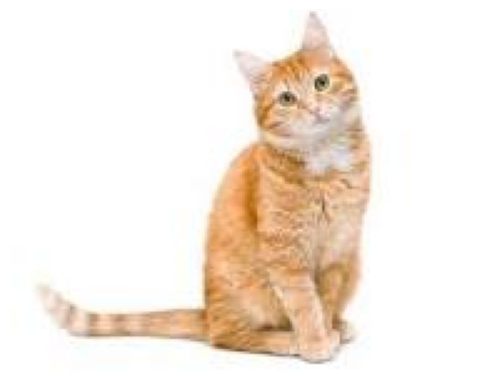

In [86]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the pre-trained CLIP model and processor
def load_pretrained_clip_model_and_processor(model_name):
    clip_processor = CLIPProcessor.from_pretrained(model_name)
    clip_model = CLIPModel.from_pretrained(model_name)
    return clip_processor, clip_model

# Handle multimodal inputs using CLIP
def handle_multimodal_inputs(text, image_path, processor, model):
    # Process the image
    image = Image.open(image_path)
    inputs = processor(
        text,
        images=image,
        return_tensors="pt",
        padding=True
    )

    # Prepare multimodal inputs
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    image_features = inputs['pixel_values']

    # Pass the inputs to the CLIP model
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=image_features)
    return outputs, image

# Example text and image path
text = "a cat"
image_path = "/content/image.jpeg"  # Replace with the actual image path

# Specify the pre-trained CLIP model
pretrained_model_name = "openai/clip-vit-base-patch16"

# Load the pre-trained CLIP processor and model
pretrained_processor, pretrained_model = load_pretrained_clip_model_and_processor(pretrained_model_name)

# Handle multimodal inputs using the pre-trained CLIP model
pretrained_outputs, image = handle_multimodal_inputs(text, image_path, pretrained_processor, pretrained_model)

# Obtain the logits from the model outputs
logits_per_image = pretrained_outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities

# Display the input image
plt.imshow(image)
plt.axis('off')
plt.show()


In [87]:

# Display the text, the predicted label, and the probability
label = pretrained_processor.tokenizer.decode(probs.argmax())
print(f"Predicted label: {label}, Probability: {probs.max().item()}")




Predicted label: !, Probability: 1.0
